# Polynomial Regression

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement Polynomial Regression
*   Create a model, train it, test it and use the model


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#download_data">Downloading Data</a></li>
        <li><a href="https://#polynomial_regression">Polynomial regression</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
print(df.head(9))

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   
5       2014  ACURA         RLX     MID-SIZE         3.5          6   
6       2014  ACURA          TL     MID-SIZE         3.5          6   
7       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
8       2014  ACURA      TL AWD     MID-SIZE         3.7          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3        

In [4]:
# Summarize data
print(df.describe())


       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

Let's select some features that we want to use for regression.


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
print(cdf.head(9))

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267


Let's plot Emission values with respect to Engine size:


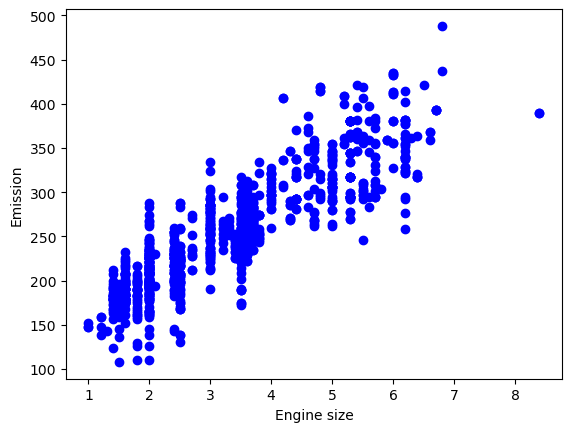

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.


In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Polynomial regression</h2>


Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    3.5  12.25]
 ...
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]


**fit_transform** takes our x values, and outputs a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example are displayed below.

$$
\begin{bmatrix}
v_1\\
v_2\\
\vdots\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
[ 1 & v_1 & v_1^2]\\
[ 1 & v_2 & v_2^2]\\
\vdots & \vdots & \vdots\\
[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\
2.4\\
1.5\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
[ 1 & 2. & 4.]\\
[ 1 & 2.4 & 5.76]\\
[ 1 & 1.5 & 2.25]\\
\vdots & \vdots & \vdots\\
\end{bmatrix}
$$



It looks like feature sets for multiple linear regression analysis, right? Yes. It Does.
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x\_1$, $x\_1^2$ with $x\_2$, and so on. Then the 2nd degree equation would be turn into:

$$y = b + \theta\_1  x\_1 + \theta\_2 x\_2$$

Now, we can deal with it as a 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such problems.

so we can use **LinearRegression()** function to solve it:


In [9]:
clf     = linear_model.LinearRegression()
clf.fit(train_x_poly, train_y)
# The coefficient
print('(Degree 2)Coefficients   :', clf.coef_)
print('(Degree 2)Intercept      :', clf.intercept_)

(Degree 2)Coefficients   : [[ 0.         48.70271554 -1.36089608]]
(Degree 2)Intercept      : [110.42070382]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line.
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


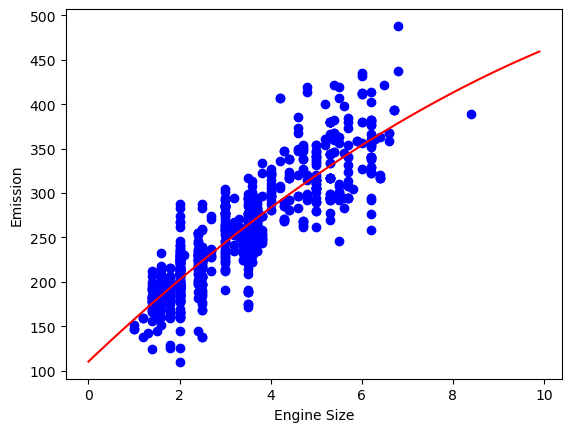

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

<h2 id="evaluation">Evaluation</h2>


In [11]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_     = clf.predict(test_x_poly)

print("(Degree 2)Mean absolute error    : %.2f"% np.mean(np.absolute(test_y_ - test_y)))
print("(Degree 2)Risidual sum error     : %.2f"% np.mean((test_y_ - test_y)** 2))
print("(Degree 2)R2-score               : %.2f"% r2_score(test_y, test_y_))

(Degree 2)Mean absolute error    : 24.88
(Degree 2)Risidual sum error     : 1065.72
(Degree 2)R2-score               : 0.74


<h2 id="practice">Practice</h2>
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?


[[ 1.     2.     4.     8.   ]
 [ 1.     2.4    5.76  13.824]
 [ 1.     3.5   12.25  42.875]
 ...
 [ 1.     3.2   10.24  32.768]
 [ 1.     3.2   10.24  32.768]
 [ 1.     3.2   10.24  32.768]]
(Degree 3)Coeffiecients          : [[ 0.         32.04366592  3.306854   -0.3941598 ]]
(Degree 3)Intecept               : [127.84478266]


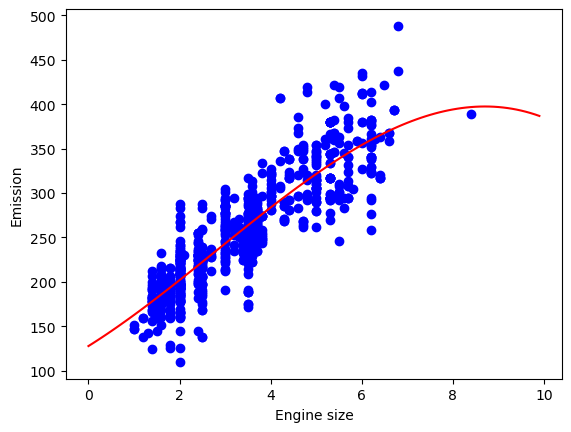

(Degree 3)Mean absolute error    : 24.71
(Degree 3)Risidual sum error     : 1056.61
(Degree 3)R2-score               : 0.74


In [14]:
# write your code here


<details><summary>Click here for the solution</summary>

```python
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
print(train_x_poly3)

clf3     = linear_model.LinearRegression()
clf3.fit(train_x_poly3, train_y)
# The coefficient
print('(Degree 3)Coeffiecients          :', clf3.coef_)
print('(Degree 3)Intecept               :', clf3.intercept_)

# Plot the trained result
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XXn = np.arange(0.0, 10.0, 0.1)
yyn = clf3.intercept_[0]+ clf3.coef_[0][1]*XXn + clf3.coef_[0][2]*np.power(XXn, 2) + clf3.coef_[0][3]*np.power(XXn, 3)
plt.plot(XXn, yyn, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

test_x_poly3    = poly3.transform(test_x)
test_y_3        = clf3.predict(test_x_poly3)
print("(Degree 3)Mean absolute error    : %.2f"% np.mean(np.absolute(test_y_3 - test_y)))
print("(Degree 3)Risidual sum error     : %.2f"% np.mean(np.absolute((test_y_3 - test_y)**2)))
print("(Degree 3)R2-score               : %.2f"% r2_score(test_y, test_y_3))

```

</details>
